In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [3]:
cifar10 = keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

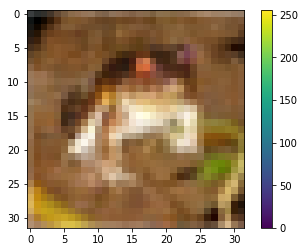

In [8]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
x_train = x_train / 255.0

x_test = x_test / 255.0

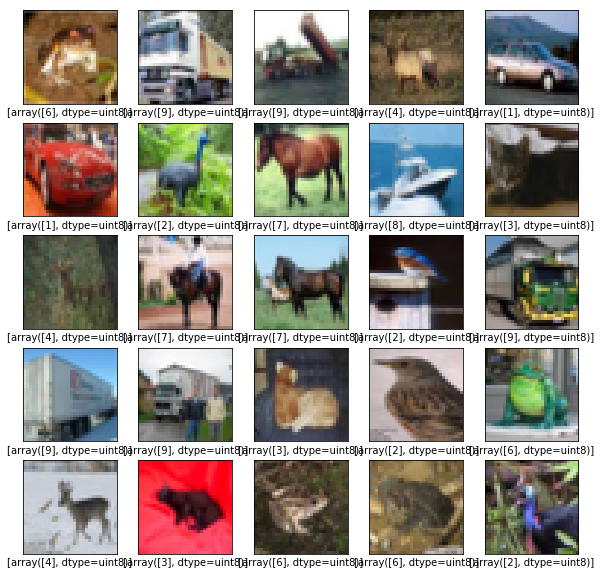

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel([y_train[i]])
plt.show()

In [11]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')



Using TensorFlow backend.


In [12]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import plot_model


In [13]:
input = Input(shape=(32,32,3))
conv1 = Conv2D(64,kernel_size=3,activation='relu',padding='same')(input)
conv2 = Conv2D(64,kernel_size=3,activation='relu',padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2,2))(conv2)
conv3 = Conv2D(128,kernel_size=3,activation='relu',padding='same')(pool1)
conv4 = Conv2D(128,kernel_size=3,activation='relu',padding='same')(conv3)
pool2 = MaxPooling2D(pool_size=(2,2))(conv4)
conv5 = Conv2D(256,kernel_size=3,activation='relu',padding='same')(pool2)
conv6 = Conv2D(256,kernel_size=3,activation='relu',padding='same')(conv5)
conv7 = Conv2D(256,kernel_size=3,activation='relu',padding='same')(conv6)
pool3 = MaxPooling2D(pool_size=(2,2))(conv7)
conv8 = Conv2D(512,kernel_size=3,activation='relu',padding='same')(pool3)
conv9 = Conv2D(512,kernel_size=3,activation='relu',padding='same')(conv8)
conv10 = Conv2D(512,kernel_size=3,activation='relu',padding='same')(conv9)
pool4= MaxPooling2D(pool_size=(2,2))(conv10)
conv11 = Conv2D(512,kernel_size=3,activation='relu',padding='same')(pool4)
conv12= Conv2D(512,kernel_size=3,activation='relu',padding='same')(conv11)
conv13 = Conv2D(512,kernel_size=3,activation='relu',padding='same')(conv12)
pool5= MaxPooling2D(pool_size=(2,2))(conv13)
flat = Flatten()(pool5)
dense1 = Dense(4096,activation='relu')(flat)
drop1 = Dropout(0.5)(dense1)
dense2 = Dense(4096,activation='relu')(drop1)
drop2 = Dropout(0.5)(dense2)
output = Dense(10,activation='softmax')(drop2)
model = Model(inputs = input,outputs = output)

W0910 11:48:29.448411 12532 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0910 11:48:29.461279 12532 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0910 11:48:29.463275 12532 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0910 11:48:29.483257 12532 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0910 11:48:29.636973 12532 deprecation_wrapper.py:119] From C:\Use

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
__________

In [15]:
from keras.utils import to_categorical

In [16]:
model.compile(optimizer = 'rmsprop',
             loss = 'sparse_categorical_crossentropy',
             metrics=['acc']) # For a multi-class classification problem

W0910 11:48:29.711550 12532 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0910 11:48:29.726550 12532 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [17]:
batch_size = 16

# 학습 이미지에 적용한 augmentation 인자를 지정해줍니다.
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# 검증 및 테스트 이미지는 augmentation을 적용하지 않습니다. 모델 성능을 평가할 때에는 이미지 원본을 사용합니다.
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('\n테스트 정확도:', test_acc)

10000/10000 [==============================] - 38s 4ms/step

테스트 정확도: 0.0988
